# Logistic regression, from scratch

As part of DATA 558, I wrote my own implementation of L2-regularized logistic regression in Python. This file demonstrates how to use my implementation with simple simulated data and with real-world data. 

If you have the numpy, matplotlib, sklearn, and pandas on your machine, the code should run without any additional setup. (The code uses the iris data set, but since this dataset is included with sklearn you don't need to download any data separately.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,6) 

import logistic as lr

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

In [2]:
# set a seed so the text can refer to output without worrying about the output changing
np.random.seed(42)

# Logistic regression with simple simulated data

As requested, this section _"allows a user to launch the method on a simple simulated dataset, visualize the training process, and print the performance"_.

The simulated data consists of:
* 50 data points with a class of '1' and a corresponding single X predictor value drawn from a normal distribution with mean 1, and 
* 50 data points with a class of '-1' and a corresponding single X predictor value drawn from a normal distribution with mean -1.

In the simulated data higher values of X are associated with class 1 and lower values are associated with class -1. However, because the centers of the two normal distributions are close, some X values "overlap" and exist in the range of numbers that's more common for the other class (as a result we shouldn't expect 100% accuracy).

In [3]:
size_of_each_class = 50
X_simple = np.append(np.random.normal(1, size=size_of_each_class), 
                     np.random.normal(-1, size=size_of_each_class))[:, np.newaxis]
X_simple.shape

(100, 1)

In [4]:
# standardize X so that it has a mean of zero, which means we don't need to fit an intercept
X_simple = scale(X_simple)

In [5]:
y_simple = np.append(np.repeat(1, size_of_each_class), np.repeat(-1, size_of_each_class))
y_simple.shape

(100,)

In [6]:
y_simple

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Split the data into train and test sets, so we can check performance after fitting the model.

In [7]:
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple)

And now train the model. The fastgradalgo function implements the fast gradient descent algorithm. It requires references to functions that evaluate the gradient and objective equations for the particular kind of regression being performed - in this case, we pass functions appropriate for logistic regression. It returns a matrix of coefficient values with one row per iteration and one column per feature in the passed X data.

By default fastgradalgo uses a fixed step size, but if a function is passed using the t_func parameter, the implementation will call the function and use the step size it returns - the call below uses a backtracking implementation in the backtracking function.

In [8]:
all_coefs_simple = lr.fastgradalgo(X_simple_train, y_simple_train, t_init=0.01, 
                                   grad_func=lr.compute_gradient_logistic_regression, 
                                   obj_func=lr.compute_objective_logistic_regression, 
                                   lam=1, iter=300, t_func=lr.backtracking)

What are the coefficients from the last iteration?

In [9]:
final_coefs_simple = lr.get_final_coefs(all_coefs_simple)
final_coefs_simple

array([[ 0.1469933]])

And, to visualize the training performance, how does the objective value change, by iteration?

Note that the objective function should generally always decrease. The plot below shows an odd bump at around 25 iterations - I'm not sure where this bump is coming from and haven't had time to investigate further. Nonetheless, it does appear that the algorithm converges and so provides a good set of coefficients: the objective value is basically flat after about 50 iterations.

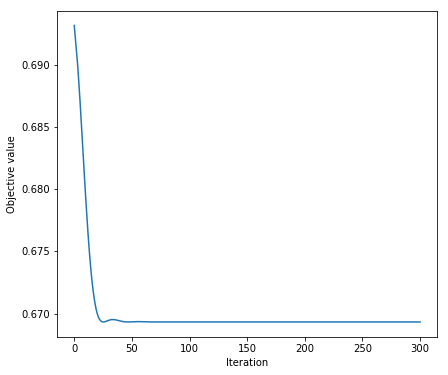

In [10]:
lr.objective_plot(all_coefs_simple, X_simple_train, y_simple_train)

Finally, how accurate are the predictions made by using these coefficients? 

In [11]:
print("Accuracy on this simulated data is {:.0%}.".format(accuracy_score(
    y_simple_test, lr.get_y_pred(final_coefs_simple, X_simple_test))))

Accuracy on this simulated data is 76%.


# Logistic regression with real world data

Per the requirement, this section _"allows a user to launch the method on a real-world dataset of your choice, visualize the training process, and print the performance"._

For this part of the demo, I'm using the iris data set (loading it via an sklearn convenience method). This data set has 150 observations with four metric predictors (characteristics of different flowers), and an output/target vector that holds one of three values (the type of iris). 

Logistic regression provides a binary output (without the use of further strategies like one-vs-one or one-vs-rest), so I'll predict if each observation is of the 'setosa' type (target value 0) or not (any other target values).

In [12]:
iris = load_iris()
X_iris = scale(iris.data)
X_iris.shape

(150, 4)

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [14]:
y_iris = np.where(iris.target == 0, 1, -1)
y_iris.shape

(150,)

In [15]:
y_iris

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [16]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris)

In [17]:
all_coefs_iris = lr.fastgradalgo(X_iris_train, y_iris_train, 0.01, 
                                 lr.compute_gradient_logistic_regression, 
                                 lr.compute_objective_logistic_regression, 
                                 lam=1, iter=300, t_func=lr.backtracking)
final_coefs_iris = lr.get_final_coefs(all_coefs_iris)
final_coefs_iris

array([[-0.11858237,  0.11835375, -0.1641994 , -0.15594726]])

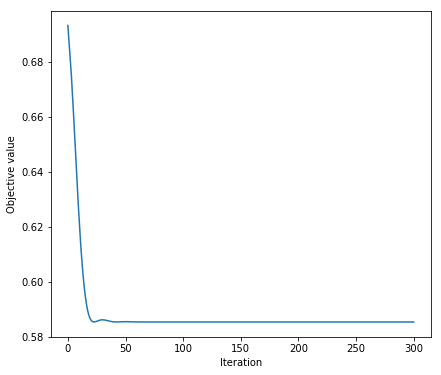

In [18]:
lr.objective_plot(all_coefs_iris, X_iris_train, y_iris_train)

In [19]:
print("Accuracy of my own logistic regression code is {:.0%}.".format(accuracy_score(
    y_iris_test, lr.get_y_pred(final_coefs_iris, X_iris_test))))

Accuracy of my own logistic regression code is 100%.


I also wrote an sklearn estimator wrapper that wraps my implementation. Using this wrapper I can pass in my implementation to any sklearn code that expects an estimator - for example, I can use my implementation with sklearn's OneVsOneClassifier and OneVsRestClassifier objects.

In [20]:
my_lr = lr.MyLogisticRegression()
my_lr.fit(X_iris_train, y_iris_train)

MyLogisticRegression(C=1, iter=300)

In [21]:
print("Accuracy of my own logistic regression with sklearn wrapper is {:.0%}.".format(accuracy_score(
    y_iris_test, my_lr.predict(X_iris_test))))

Accuracy of my own logistic regression with sklearn wrapper is 100%.


# Comparison of my code with sklearn's LogisticRegression classifier

Per the requirement, this section allows _"a user to run an experimental comparison between your implementation and scikit-learn’s on either a simulated or real-world dataset."_

The accuracy of my implementation is shown immediately above. The code below uses sklearn's LogisticRegression classifier on the same data and with the same value for the lambda/C parameter, to produce the accuracy below and show that both my implementation and the sklearn implementation predict equally well.

In [22]:
skl_lr = LogisticRegression(fit_intercept=False) # no intercept, just like we do above
skl_lr.fit(X_iris_train, y_iris_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
print("Accuracy of sklearn LogisticRegression is {:.0%}.".format(accuracy_score(
    y_iris_test, skl_lr.predict(X_iris_test))))

Accuracy of sklearn LogisticRegression is 100%.
